In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, log_loss, confusion_matrix, roc_curve, roc_auc_score,recall_score
import matplotlib.pyplot as plt


data = pd.read_csv(r"C:\Users\beher\OneDrive\Desktop\NEW_METHOD\data_wo_cluster.csv")


data = data.sample(frac=1).reset_index(drop=True)


X = data.drop(columns=['CLASS'])
y = data['CLASS']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols), 
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  
    ])

preprocessor.fit(X_train)
X_train_encoded = preprocessor.transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

In [2]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_encoded, y_train)

RandomForestClassifier(random_state=42)

In [3]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, log_loss, confusion_matrix, roc_curve, roc_auc_score,recall_score
y_test_pred = model.predict(X_test_encoded)
y_test_pred_prob = model.predict_proba(X_test_encoded)

True Positive Rate (TPR): 0.7274590163934426
False Positive Rate (FPR): 0.24055666003976142
False Negative Rate (FNR): 0.2725409836065574
True Negative Rate (TNR): 0.7594433399602386
Accuracy: 0.7436932391523713
Precision: 0.7457983193277311
F1 Score: 0.7365145228215768
Log Loss: 0.5352030715248306
ROC AUC Score: 0.8084464524329434
Recall 0.7274590163934426


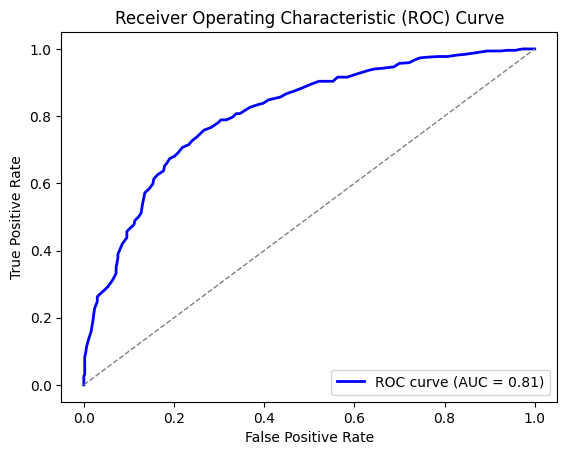

In [4]:
conf_matrix = confusion_matrix(y_test, y_test_pred)

TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
logloss = log_loss(y_test, y_test_pred_prob)
roc_auc = roc_auc_score(y_test, y_test_pred_prob[:, 1])
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)
TNR = TN / (TN + FP)

print("True Positive Rate (TPR):", TPR)
print("False Positive Rate (FPR):", FPR)
print("False Negative Rate (FNR):", FNR)
print("True Negative Rate (TNR):", TNR)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)
print("Log Loss:", logloss)
print("ROC AUC Score:", roc_auc)
print("Recall", recall)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob[:, 1])
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Confusion Matrix:
[[382 121]
 [133 355]]


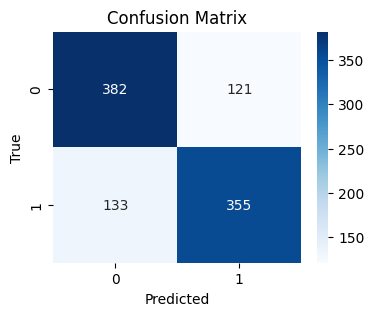

In [5]:
import seaborn as sns
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(4, 3))  # Adjust the figsize as needed
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [25]:
new_data = pd.read_csv(r"C:\Users\beher\OneDrive\Desktop\NEW_METHOD\NEW_TESTING.csv")
preprocessor.fit(X_train)

X_new_encoded = preprocessor.transform(new_data)
y_pred_prob_new = model.predict_proba(X_new_encoded)

In [26]:
import pandas as pd
prob_df = pd.DataFrame(y_pred_prob_new, columns=['Probability_class_0', 'Probability_class_1'])
new_data_with_prob = pd.concat([new_data, prob_df], axis=1)
new_data_with_prob.to_csv('rf_cat_lulc3_method_with_probabilities.csv', index=False)

In [6]:
new_data = pd.read_csv(r"C:\Users\beher\OneDrive\Desktop\NEW_METHOD\ls_merge_data.csv")
preprocessor.fit(X_train)

X_new_encoded = preprocessor.transform(new_data)
y_pred_prob_new = model.predict_proba(X_new_encoded)
import pandas as pd
prob_df = pd.DataFrame(y_pred_prob_new, columns=['Probability_class_0', 'Probability_class_1'])
new_data_with_prob = pd.concat([new_data, prob_df], axis=1)
new_data_with_prob.to_csv('rf_NEWSHING_lulc3_method_with_probabilities.csv', index=False)

In [6]:
import shap

In [7]:
import shap

# Create a function to wrap the predict method of the SVM classifier
def rf_predict(X):
    return model.predict_proba(X)

# Create a SHAP explainer object with the callable function
explainer = shap.Explainer(rf_predict, X_train_encoded.toarray())

# Calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test_encoded.toarray())

# Summary plot (global explanation)
shap.summary_plot(shap_values, X_test_encoded.toarray(), feature_names=feature_names)

# Force plot for a specific prediction (local explanation)
# Replace index with the index of the specific prediction you want to explain
shap.force_plot(explainer.expected_value[0], shap_values[0][index], X_test_encoded.toarray()[index], feature_names=feature_names)



PermutationExplainer explainer: 992it [07:42,  2.13it/s]                                                               


NameError: name 'feature_names' is not defined

In [8]:
feature_names = X.columns

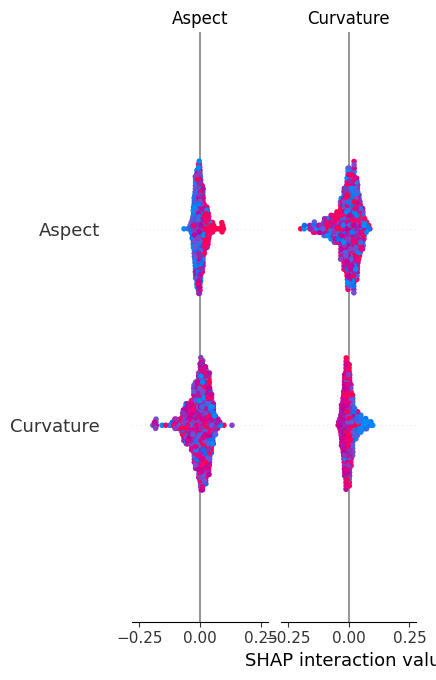

In [10]:
shap.summary_plot(shap_values, X_test_encoded.toarray(), feature_names=feature_names)


In [11]:
# Force plot for a specific prediction (local explanation)
# Replace index with the index of the specific prediction you want to explain
index = 0  # Change this to the index of the specific prediction you want to explain
shap.force_plot(explainer.expected_value[0], shap_values[0][index], X_test_encoded.toarray()[index], feature_names=feature_names)


AttributeError: 'PermutationExplainer' object has no attribute 'expected_value'

In [12]:
# Create a SHAP explainer object using TreeExplainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test_encoded.toarray())

# Force plot for a specific prediction (local explanation)
# Replace index with the index of the specific prediction you want to explain
index = 0  # Change this to the index of the specific prediction you want to explain
shap.force_plot(explainer.expected_value[1], shap_values[1][index], X_test_encoded.toarray()[index], feature_names=feature_names)


DimensionError: Length of features is not equal to the length of shap_values!

In [13]:
# Check the length of features
num_features = len(feature_names)
print("Number of features:", num_features)

# Check the length of SHAP values
num_shap_values = shap_values[1].shape[1]
print("Number of SHAP values:", num_shap_values)


Number of features: 10
Number of SHAP values: 2


TypeError: only integer scalar arrays can be converted to a scalar index

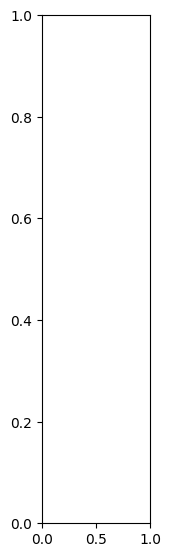

In [17]:
import shap

# Define feature names
feature_names = ['Aspect', 'Curvature', 'Dist_from_Lineaments', 'Slope', 'SPI', 'TRI', 'Geomorphology', 'Soil', 'Lithology', 'LULC']


explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test_encoded.toarray())

# Summary plot (global explanation)
shap.summary_plot(shap_values, X_test_encoded.toarray(), feature_names=feature_names)

# Force plot for a specific prediction (local explanation)
# Replace index with the index of the specific prediction you want to explain
index = 0  # Change this to the index of the specific prediction you want to explain
shap.force_plot(explainer.expected_value[1], shap_values[1][index], X_test_encoded.toarray()[index], feature_names=feature_names)

In [24]:
from sklearn.inspection import permutation_importance
from sklearn.inspection import permutation_importance

# Convert sparse matrix to dense numpy array
X_test_dense = X_test_encoded.toarray()

# Calculate permutation feature importance
perm_importance = permutation_importance(model, X_test_dense, y_test, n_repeats=10, random_state=42)

# Get feature importance scores
feature_importance = perm_importance.importances_mean

# Get feature names
feature_names = X.columns

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importance
print(feature_importance_df)


ValueError: All arrays must be of the same length

In [25]:
# Check the shape of X before and after one-hot encoding
print("Shape of X before one-hot encoding:", X.shape)
print("Shape of X_train_encoded after one-hot encoding:", X_train_encoded.shape)

# Get the feature names after one-hot encoding
encoded_feature_names = preprocessor.transformers_[1][1].get_feature_names_out(input_features=categorical_cols)

# Combine numerical and encoded feature names
feature_names = numerical_cols + list(encoded_feature_names)

# Check the length of feature names
print("Number of feature names:", len(feature_names))

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importance
print(feature_importance_df)


Shape of X before one-hot encoding: (3303, 10)
Shape of X_train_encoded after one-hot encoding: (2312, 74)
Number of feature names: 74
                                              Feature  Importance
63         Lithology_ACID TO INTERMEDIATE CHARNOCKITE    0.036731
59                            Soil_Ustic Haplohumults    0.012916
16                           LULC_Forest-Scrub forest    0.012109
42  Geomorphology_StrOri  Moderately Dissected Hil...    0.007871
5                                                 TRI    0.007871
..                                                ...         ...
26  Geomorphology_DenOri  Pediment-Pediplain Compl...   -0.001009
12   LULC_Forest Deciduous (Dry / Moist / Thorn)-Open   -0.001110
3                                               Slope   -0.001312
56                            Soil_Typic Haplohumults   -0.002321
14  LULC_Forest-Evergreen / Semi evergreen-Dense /...   -0.002624

[74 rows x 2 columns]


In [26]:
# Extract top 10 influencing features
top_10_features = feature_importance_df.nlargest(10, 'Importance')

# Save the DataFrame to an Excel file
file_path = 'feature_importance.xlsx'
top_10_features.to_excel(file_path, index=False)

print(f"Top 10 influencing features saved to {file_path}")


Top 10 influencing features saved to feature_importance.xlsx


In [30]:
import pandas as pd

# Filter feature names with specific prefixes
prefixes = ['Aspect', 'Curvature', 'Dist_from_Lineaments', 'Slope', 'SPI', 'TRI', 'Geomorphology_', 'Soil_', 'Lithology_', 'LULC_']
filtered_features = [feature for feature in feature_names if any(feature.startswith(prefix) for prefix in prefixes)]

# Filter the DataFrame to include only the filtered features
filtered_df = feature_importance_df[feature_importance_df['Feature'].isin(filtered_features)]

# Compute the average importance for each prefix
average_importance = filtered_df.groupby(lambda x: x.split('_')[0] if '_' in x else x, as_index=False)['Importance'].mean()

print(average_importance)


TypeError: argument of type 'int' is not iterable

In [31]:
# Debugging the lambda function
for x in filtered_df['Feature']:
    print(x)


Lithology_ACID TO INTERMEDIATE CHARNOCKITE
Soil_Ustic Haplohumults
LULC_Forest-Scrub forest
Geomorphology_StrOri  Moderately Dissected Hills and Valleys
TRI
Lithology_PINK GRANITE GNEISS
Lithology_BIOTITE GNEISS
Geomorphology_StrOri  Highly Dissected Hills and Valleys
Curvature
Soil_Ustic Palehumults
Dist_from_Lineaments
Geomorphology_StrOri  Moderately Dissected Hills and Valleys Strike Ridge
Lithology_HORNBLENDE BIOTITE GNEISS
LULC_Forest- Forest Plantation
SPI
LULC_Forest Deciduous (Dry / Moist / Thorn)-Dense / Closed
Lithology_GRANITE
Geomorphology_StrOri  Low Dissected Hills and Valleys
Soil_Typic Haplustepts
LULC_Wastelands-Scrub land Dense / Closed
Geomorphology_StrOri  Highly Dissected Hills and Valleys Valley
LULC_Built Up Rural
Geomorphology_StrOri  Low Dissected Hills and Valleys Scarp
Geomorphology_StrOri  Highly Dissected Hills and Valleys Intermontane Valley
Geomorphology_StrOri  Low Dissected Hills and Valleys Valley
Soil_Lithic Ustorthents
Geomorphology_StrOri  Highly D

In [32]:
# Define the list of prefixes
prefixes = ['Aspect', 'Curvature', 'Dist_from_Lineaments', 'Slope', 'SPI', 'TRI', 'Geomorphology', 'Soil', 'Lithology', 'LULC']

# Filter the DataFrame to include only features with the specified prefixes
filtered_df = feature_importance_df[feature_importance_df['Feature'].str.startswith(tuple(prefixes))]

# Compute the average importance for each prefix
average_importance = filtered_df.groupby(lambda x: x.split('_')[0], as_index=False)['Importance'].mean()

print(average_importance)


AttributeError: 'int' object has no attribute 'split'

In [33]:
# List of features you want to get importance for
features_list = [
    'Lithology_ACID TO INTERMEDIATE CHARNOCKITE',
    'Soil_Ustic Haplohumults',
    'LULC_Forest-Scrub forest',
    'Geomorphology_StrOri  Moderately Dissected Hills and Valleys',
    'TRI',
    'Lithology_PINK GRANITE GNEISS',
    # Add more features here as needed
]

# Filter the DataFrame to include only the specified features
individual_importance = feature_importance_df[feature_importance_df['Feature'].isin(features_list)]

print(individual_importance)


                                              Feature  Importance
63         Lithology_ACID TO INTERMEDIATE CHARNOCKITE    0.036731
59                            Soil_Ustic Haplohumults    0.012916
16                           LULC_Forest-Scrub forest    0.012109
42  Geomorphology_StrOri  Moderately Dissected Hil...    0.007871
5                                                 TRI    0.007871
70                      Lithology_PINK GRANITE GNEISS    0.007064


In [34]:
features_list = [
    'Lithology_ACID TO INTERMEDIATE CHARNOCKITE',
    'Soil_Ustic Haplohumults',
    'LULC_Forest-Scrub forest',
    'Geomorphology_StrOri  Moderately Dissected Hills and Valleys',
    'TRI',
    'Lithology_PINK GRANITE GNEISS',
    'Lithology_BIOTITE GNEISS',
    'Geomorphology_StrOri  Highly Dissected Hills and Valleys',
    'Curvature',
    'Soil_Ustic Palehumults',
    'Dist_from_Lineaments',
    'Geomorphology_StrOri  Moderately Dissected Hills and Valleys Strike Ridge',
    'Lithology_HORNBLENDE BIOTITE GNEISS',
    'LULC_Forest- Forest Plantation',
    'SPI',
    'LULC_Forest Deciduous (Dry / Moist / Thorn)-Dense / Closed',
    'Lithology_GRANITE',
    'Geomorphology_StrOri  Low Dissected Hills and Valleys',
    'Soil_Typic Haplustepts',
    'LULC_Wastelands-Scrub land Dense / Closed',
    'Geomorphology_StrOri  Highly Dissected Hills and Valleys Valley',
    'LULC_Built Up Rural',
    'Geomorphology_StrOri  Low Dissected Hills and Valleys Scarp',
    'Geomorphology_StrOri  Highly Dissected Hills and Valleys Intermontane Valley',
    'Geomorphology_StrOri  Low Dissected Hills and Valleys Valley',
    'Soil_Lithic Ustorthents',
    'Geomorphology_StrOri  Highly Dissected Hills and Valleys Strike Ridge',
    'Lithology_BANDED IRON FORMATION',
    'Geomorphology_DenOri  Low Dissected Hills and Valleys',
    'LULC_Water Bodies',
    'Soil_Oxic Dystrustepts',
    'Soil_Ustic Kandihumults',
    'Geomorphology_StrOri  Moderately Dissected Hills and Valleys Valley',
    'LULC_Agricultural land-Plantation',
    'LULC_Grass/Grazing -Temperate / Sub Tropical Temperate / Sub Tropical',
    'LULC_Wastelands Barren rocky',
    'Aspect',
    'LULC_Wastelands-Scrub land Open',
    'Geomorphology_WaterBodies River',
    'Geomorphology_StrOri  Moderately Dissected Hills and Valleys Scarp',
    'Geomorphology_StrOri  Highly Dissected Hills and Valleys Scarp',
    'LULC_Built Up-Urban - Sparse (Discontinuous)',
    'Soil_Typic Rhodustalfs',
    'Geomorphology_ DenOri  Moderately Dissected Hills and Valleys Scarp',
    'LULC_Forest-Evergreen / Semi evergreen-Open',
    'Soil_Water Body',
    'Lithology_CALC GRANULITE WITH LIMESTONE',
    'Soil_Rhodic Paleustalfs',
    'LULC_Agricultural land-Fallow land',
    'LULC_Agricultural land - Cropped in 2 seasons',
    'Lithology_HYPERSTHENE GNEISS CORDIERITE',
    'Lithology_PYROXENE GRANULITE',
    'Lithology_QUARTZ VEIN/REEF',
    'Geomorphology_StrOri  Low Dissected Hills and Valleys Ridge',
    'Soil_Rock outcrops',
    'Lithology_QUARTZITE',
    'Soil_Oxic Dystrudepts',
    'Geomorphology_StrOri  Highly Dissected Hills and Valleys Ridge',
    'Geomorphology_WaterBodies Pond',
    'Geomorphology_StrOri  Low Dissected Hills and Valleys Strike Ridge',
    'Geomorphology_DenOri Pediment-Pediplain Complex Residual Mound',
    'Geomorphology_DenOri  Pediment-Pediplain Complex Valley Fill',
    'Geomorphology_DenOri Pediment-Pediplain Complex Pediplain',
    'Geomorphology_AntOri Anthropogenic Terrain Dam and Reservoir',
    'Soil_Fluventic Haplustepts',
    'Soil_Dystric Haplustepts',
    'Geomorphology_StrOri  Moderately Dissected Hills and Valleys Ridge',
    'Geomorphology_DenOri  Pediment-Pediplain Complex Pediment',
    'Geomorphology_DenOri Moderately Dissected Hills and Valleys',
    'Geomorphology_DenOri  Pediment-Pediplain Complex Rolling Plain',
    'LULC_Forest Deciduous (Dry / Moist / Thorn)-Open',
    'Slope',
    'Soil_Typic Haplohumults',
    'LULC_Forest-Evergreen / Semi evergreen-Dense / Closed'
]
individual_importance = feature_importance_df[feature_importance_df['Feature'].isin(features_list)]

print(individual_importance)

                                              Feature  Importance
63         Lithology_ACID TO INTERMEDIATE CHARNOCKITE    0.036731
59                            Soil_Ustic Haplohumults    0.012916
16                           LULC_Forest-Scrub forest    0.012109
42  Geomorphology_StrOri  Moderately Dissected Hil...    0.007871
5                                                 TRI    0.007871
..                                                ...         ...
26  Geomorphology_DenOri  Pediment-Pediplain Compl...   -0.001009
12   LULC_Forest Deciduous (Dry / Moist / Thorn)-Open   -0.001110
3                                               Slope   -0.001312
56                            Soil_Typic Haplohumults   -0.002321
14  LULC_Forest-Evergreen / Semi evergreen-Dense /...   -0.002624

[74 rows x 2 columns]


In [36]:
import pandas as pd

# Assuming the DataFrame is stored in a variable called 'df'
feature_importance_df.to_csv('feature_importance_rf.csv', index=False)


In [8]:
import shap

In [ ]:
explainer = shap.KernelExplainer(model.predict, shap.sample(X_test_encoded, 100))
shap_values = explainer.shap_values(X_test_encoded)


  0%|          | 0/991 [00:00<?, ?it/s]